# BertaQA OpenAI Basque and English

In [2]:
import pandas as pd

def get_dataframe(model, config):
    df = pd.read_json(f"../results/{model}/bertaqa_{config}_5-shot.jsonl", lines=True)
    return df

In [3]:
df_gpt35turbo_bertaqa_eu = get_dataframe("gpt-3.5-turbo-0125", "eu")

df_gpt35turbo_bertaqa_en = get_dataframe("gpt-3.5-turbo-0125", "en")

df_gpt4turbo_bertaqa_eu = get_dataframe("gpt-4-0125-preview", "eu")

df_gpt4turbo_bertaqa_en = get_dataframe("gpt-4-0125-preview", "en")

df_gpt4_bertaqa_eu = get_dataframe("gpt-4-0613", "eu")

df_gpt4_bertaqa_en = get_dataframe("gpt-4-0613", "en")

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_dataframe_bertaqa(df):
    # add acc column 1 if correct else 0
    df["acc"] = df.apply(lambda x: 1 if x["correct"] else 0, axis=1)
    
    mean_accuracy = df["acc"].mean()
    display(mean_accuracy)
    
    # group by the "group" column and calculate the mean accuracy for each group
    # group attribute is in dict "doc"
    grouped = df.groupby("group")["acc"].mean()

    # group by the "difficulty" column and calculate the mean accuracy for each difficulty
    # difficulty attribute is in dict "doc"
    grouped_difficulty = df.groupby("difficulty")["acc"].mean()

    # group by the "category" column and calculate the mean accuracy for each category
    # category attribute is in dict "doc"
    grouped_category = df.groupby("category")["acc"].mean()

    # group by the "group" and "category" columns and calculate the mean accuracy for each group and category combination
    grouped_group_category = df.groupby(["category", "group"])["acc"].mean()

    # group by the "difficulty" and "category" columns and calculate the mean accuracy for each difficulty and category combination
    grouped_difficulty_category = df.groupby(["category", "difficulty"])["acc"].mean()

    # group by the "group" and "difficulty" columns and calculate the mean accuracy for each group and difficulty combination
    grouped_group_difficulty = df.groupby(["difficulty", "group"])["acc"].mean()

    # plot the results
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    grouped.plot(kind="bar", ax=axs[0], rot=0, title="Accuracy by Group")
    display(grouped)
    # grouped_difficulty.plot(kind="bar", ax=axs[0, 1], rot=0, title="Accuracy by Difficulty")
    grouped_category.plot(kind="bar", ax=axs[1], rot=90, title="Accuracy by Category")
    display(grouped_category)
    display(grouped_difficulty)
    
    # grouped_group_category.unstack().plot(kind="bar", ax=axs[1, 1], rot=90, title="Accuracy by Category and Group")
    
    # grouped_difficulty_category.unstack().plot(kind="bar", ax=axs[2, 0], rot=90, title="Accuracy by Difficulty and Category")
    
    # grouped_group_difficulty.unstack().plot(kind="bar", ax=axs[2, 1], rot=0, title="Accuracy by Group and Difficulty")


0.7449537426408747

group
Euskal gaiak     0.629442
Gai orokorrak    0.859114
Name: acc, dtype: float64

category
Euskara eta literatura     0.720325
Geografia eta Historia     0.756667
Gizartea eta ohiturak      0.826235
Kirola eta aisialdia       0.742905
Kultura eta artea          0.779690
Musika eta dantza          0.646859
Zientzia eta teknologia    0.736395
Zinema eta ikuskizunak     0.752094
Name: acc, dtype: float64

difficulty
1    0.788256
2    0.739181
3    0.697831
Name: acc, dtype: float64

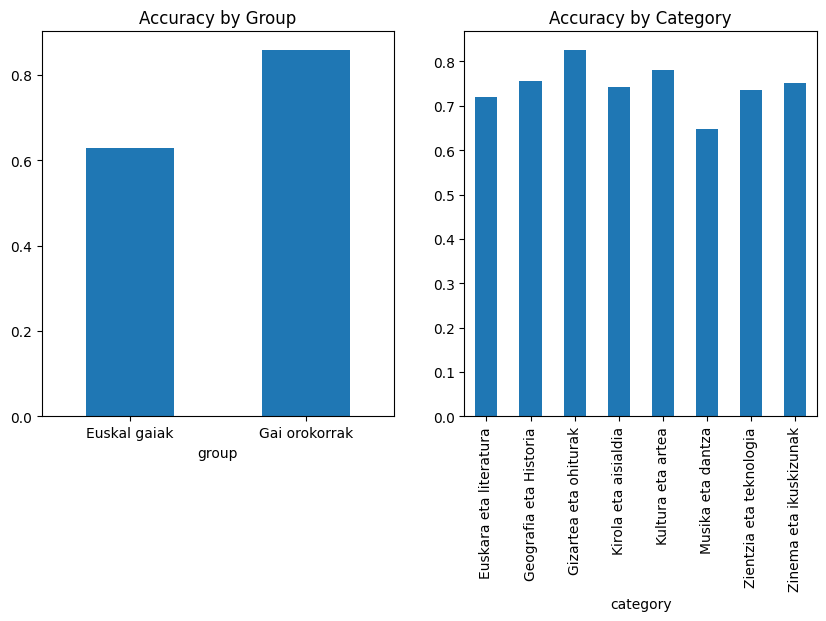

In [5]:
plot_dataframe_bertaqa(df_gpt4_bertaqa_eu)

In [6]:
import matplotlib.pyplot as plt

def plot_eu_en_sizes(df_gpt35turbo_bertaqa_eu, df_gpt35turbo_bertaqa_en, df_gpt4turbo_bertaqa_eu, df_gpt4turbo_bertaqa_en, df_gpt4_bertaqa_eu, df_gpt4_bertaqa_en):
    merged = pd.DataFrame()
    merged["M=GPT3.5 Turbo D=EU"] = df_gpt35turbo_bertaqa_eu.apply(lambda x: 1 if x["correct"] else 0, axis=1)
    merged["M=GPT3.5 Turbo D=EN"] = df_gpt35turbo_bertaqa_en.apply(lambda x: 1 if x["correct"] else 0, axis=1)
    merged["M=GPT4         D=EU"] = df_gpt4_bertaqa_eu.apply(lambda x: 1 if x["correct"] else 0, axis=1)
    merged["M=GPT4         D=EN"] = df_gpt4_bertaqa_en.apply(lambda x: 1 if x["correct"] else 0, axis=1)
    merged["M=GPT4 Turbo    D=EU"] = df_gpt4turbo_bertaqa_eu.apply(lambda x: 1 if x["correct"] else 0, axis=1)
    merged["M=GPT4 Turbo    D=EN"] = df_gpt4turbo_bertaqa_en.apply(lambda x: 1 if x["correct"] else 0, axis=1)
    merged["group"] = df_gpt35turbo_bertaqa_eu["group"]
    merged["difficulty"] = df_gpt35turbo_bertaqa_eu["difficulty"]
    merged["category"] = df_gpt35turbo_bertaqa_eu["category"]
    
    display(merged)
    merged_mean = merged.mean(numeric_only=True)
    display((merged_mean * 100).round(2))

    merged_grouped = merged.groupby("group").mean(numeric_only=True)
    merged_grouped_difficulty = merged.groupby("difficulty").mean(numeric_only=True)
    merged_grouped_category = merged.groupby("category").mean(numeric_only=True)
    # remove difficulty from merged_grouped and merged_grouped_category
    merged_grouped.drop("difficulty", axis=1, inplace=True)
    merged_grouped_category.drop("difficulty", axis=1, inplace=True)
    display((merged_grouped.T * 100).round(2))
    display((merged_grouped_category.T * 100).round(2))
    display((merged_grouped_difficulty.T * 100).round(2))

    fig, axs = plt.subplots(1, 2, figsize=(20, 6))
    merged_grouped.plot(kind="bar", ax=axs[0], rot=0, title="Accuracy by Group")
    #merged_grouped_difficulty.plot(kind="bar", ax=axs[2], rot=0, title="Accuracy by Difficulty")
    merged_grouped_category.plot(kind="bar", ax=axs[1], rot=90, title="Accuracy by Category")
    
    # add plot that combines group and category
    merged_group_category = merged.groupby(["category", "group"]).mean(numeric_only=True)
    merged_group_category.drop("difficulty", axis=1, inplace=True)
    display((merged_group_category.T * 100).round(2))
    merged_group_category.plot(kind="bar", rot=90, title="Accuracy by Category and Group")
    
    # make this plot bigger
    plt.gcf().set_size_inches(20, 6)
    
    # add plot that combines group and difficulty
    merged_group_difficulty = merged.groupby(["difficulty", "group"]).mean(numeric_only=True)
    display((merged_group_difficulty.T * 100).round(2))
    merged_group_difficulty.plot(kind="bar", rot=90, title="Accuracy by Group and Difficulty")
    
    # add plot that only shows results in "Euskal gaiak" group and difficulty 3 by category
    merged_group_difficulty_category = merged[(merged["group"] == "Euskal gaiak") & (merged["difficulty"] == 3)].groupby(["category"]).mean(numeric_only=True)
    merged_group_difficulty_category.drop("difficulty", axis=1, inplace=True)
    display((merged_group_difficulty_category.T * 100).round(2))
    

,M=GPT3.5 Turbo D=EU,M=GPT3.5 Turbo D=EN,M=GPT4 D=EU,M=GPT4 D=EN,M=GPT4 Turbo D=EU,M=GPT4 Turbo D=EN,group,difficulty,category
0,1,1,1,1,1,1,Gai orokorrak,3,Geografia eta Historia
1,1,1,1,1,1,1,Euskal gaiak,1,Zinema eta ikuskizunak
2,1,1,1,1,1,1,Euskal gaiak,1,Geografia eta Historia
3,1,1,1,1,0,0,Gai orokorrak,3,Euskara eta literatura
4,1,1,1,1,1,1,Euskal gaiak,3,Zinema eta ikuskizunak
...,...,...,...,...,...,...,...,...,...
4751,1,1,1,1,1,1,Euskal gaiak,1,Geografia eta Historia
4752,0,1,0,0,0,0,Euskal gaiak,2,Kirola eta aisialdia
4753,0,1,1,1,1,1,Euskal gaiak,1,Kirola eta aisialdia
4754,1,1,1,1,1,1,Gai orokorrak,2,Zinema eta ikuskizunak


M=GPT3.5 Turbo D=EU      56.79
M=GPT3.5 Turbo D=EN      68.82
M=GPT4         D=EU      74.50
M=GPT4         D=EN      80.72
M=GPT4 Turbo    D=EU     79.39
M=GPT4 Turbo    D=EN     81.98
difficulty              192.66
dtype: float64

group,Euskal gaiak,Gai orokorrak
M=GPT3.5 Turbo D=EU,47.25,66.22
M=GPT3.5 Turbo D=EN,55.08,82.40
M=GPT4 D=EU,62.94,85.91
M=GPT4 D=EN,69.88,91.43
M=GPT4 Turbo D=EU,69.46,89.21
M=GPT4 Turbo D=EN,72.17,91.68


category,Euskara eta literatura,Geografia eta Historia,Gizartea eta ohiturak,Kirola eta aisialdia,Kultura eta artea,Musika eta dantza,Zientzia eta teknologia,Zinema eta ikuskizunak
M=GPT3.5 Turbo D=EU,52.68,59.17,56.05,56.93,58.00,54.50,57.48,59.63
M=GPT3.5 Turbo D=EN,63.09,70.83,74.96,68.61,68.67,60.44,73.47,70.69
M=GPT4 D=EU,72.03,75.67,82.62,74.29,77.97,64.69,73.64,75.21
M=GPT4 D=EN,76.75,81.33,87.22,78.80,83.82,73.01,85.37,79.73
M=GPT4 Turbo D=EU,77.56,81.00,86.54,79.47,82.27,70.97,79.25,78.22
M=GPT4 Turbo D=EN,80.81,83.83,87.73,81.80,86.57,71.65,83.50,80.07


difficulty,1,2,3
M=GPT3.5 Turbo D=EU,62.34,56.15,50.64
M=GPT3.5 Turbo D=EN,78.53,66.99,58.94
M=GPT4 D=EU,78.83,73.92,69.78
M=GPT4 D=EN,86.36,79.80,74.79
M=GPT4 Turbo D=EU,84.99,78.07,74.05
M=GPT4 Turbo D=EN,87.43,81.19,76.14


category             Euskara eta literatura                \
group                          Euskal gaiak Gai orokorrak   
M=GPT3.5 Turbo D=EU                   43.93         61.29   
M=GPT3.5 Turbo D=EN                   51.48         74.52   
M=GPT4         D=EU                   62.95         80.97   
M=GPT4         D=EN                   67.87         85.48   
M=GPT4 Turbo    D=EU                  70.16         84.84   
M=GPT4 Turbo    D=EN                  75.41         86.13   

category             Geografia eta Historia                \
group                          Euskal gaiak Gai orokorrak   
M=GPT3.5 Turbo D=EU                   47.33         71.00   
M=GPT3.5 Turbo D=EN                   56.67         85.00   
M=GPT4         D=EU                   64.00         87.33   
M=GPT4         D=EN                   70.67         92.00   
M=GPT4 Turbo    D=EU                  72.67         89.33   
M=GPT4 Turbo    D=EN                  77.67         90.00   

category             Gizartea eta ohiturak               Kirola eta aisialdia  \
group                         Euskal gaiak Gai orokorrak         Euskal gaiak   
M=GPT3.5 Turbo D=EU                  51.56         60.40                47.64   
M=GPT3.5 Turbo D=EN                  64.36         85.23                55.07   
M=GPT4         D=EU                  76.47         88.59                60.81   
M=GPT4         D=EN                  81.66         92.62                65.54   
M=GPT4 Turbo    D=EU                 83.04         89.93                67.91   
M=GPT4 Turbo    D=EN                 83.04         92.28                70.27   

category                           Kultura eta artea                \
group                Gai orokorrak      Euskal gaiak Gai orokorrak   
M=GPT3.5 Turbo D=EU          66.01             46.10         70.28   
M=GPT3.5 Turbo D=EN          81.85             53.56         84.27   
M=GPT4         D=EU          87.46             66.78         89.51   
M=GPT4         D=EN          91.75             72.20         95.80   
M=GPT4 Turbo    D=EU         90.76             72.20         92.66   
M=GPT4 Turbo    D=EN         93.07             76.61         96.85   

category             Musika eta dantza               Zientzia eta teknologia  \
group                     Euskal gaiak Gai orokorrak            Euskal gaiak   
M=GPT3.5 Turbo D=EU              41.87         66.67                   49.32   
M=GPT3.5 Turbo D=EN              42.21         78.00                   62.33   
M=GPT4         D=EU              49.13         79.67                   63.70   
M=GPT4         D=EN              54.33         91.00                   80.82   
M=GPT4 Turbo    D=EU             53.98         87.33                   71.92   
M=GPT4 Turbo    D=EN             52.94         89.67                   76.03   

category                           Zinema eta ikuskizunak                
group                Gai orokorrak           Euskal gaiak Gai orokorrak  
M=GPT3.5 Turbo D=EU          65.54                  50.34         68.90  
M=GPT3.5 Turbo D=EN          84.46                  55.03         86.29  
M=GPT4         D=EU          83.45                  59.73         90.64  
M=GPT4         D=EN          89.86                  66.11         93.31  
M=GPT4 Turbo    D=EU         86.49                  63.76         92.64  
M=GPT4 Turbo    D=EN         90.88                  65.10         94.98

difficulty                      1                          2                \
group                Euskal gaiak Gai orokorrak Euskal gaiak Gai orokorrak   
M=GPT3.5 Turbo D=EU         54.72         69.85        45.63         66.48   
M=GPT3.5 Turbo D=EN         67.50         89.40        51.22         82.49   
M=GPT4         D=EU         67.98         89.52        62.05         85.58   
M=GPT4         D=EN         78.26         94.35        67.75         91.65   
M=GPT4 Turbo    D=EU        78.02         91.87        66.82         89.13   
M=GPT4 Turbo    D=EN        80.05         94.70        70.20         91.99   

difficulty                      3                
group                Euskal gaiak Gai orokorrak  
M=GPT3.5 Turbo D=EU         39.97         61.29  
M=GPT3.5 Turbo D=EN         44.46         73.39  
M=GPT4         D=EU         57.78         81.76  
M=GPT4         D=EN         62.13         87.44  
M=GPT4 Turbo    D=EU        62.13         85.95  
M=GPT4 Turbo    D=EN        64.82         87.44

category,Euskara eta literatura,Geografia eta Historia,Gizartea eta ohiturak,Kirola eta aisialdia,Kultura eta artea,Musika eta dantza,Zientzia eta teknologia,Zinema eta ikuskizunak
M=GPT3.5 Turbo D=EU,40.18,31.25,46.15,42.50,37.50,36.25,40.51,45.57
M=GPT3.5 Turbo D=EN,53.57,40.00,53.85,42.50,33.75,33.75,43.04,51.90
M=GPT4 D=EU,64.29,56.25,66.67,45.00,65.00,45.00,59.49,58.23
M=GPT4 D=EN,64.29,58.75,70.51,53.75,67.50,45.00,70.89,65.82
M=GPT4 Turbo D=EU,66.96,61.25,73.08,51.25,70.00,43.75,63.29,65.82
M=GPT4 Turbo D=EN,73.21,66.25,70.51,58.75,80.00,36.25,58.23,72.15


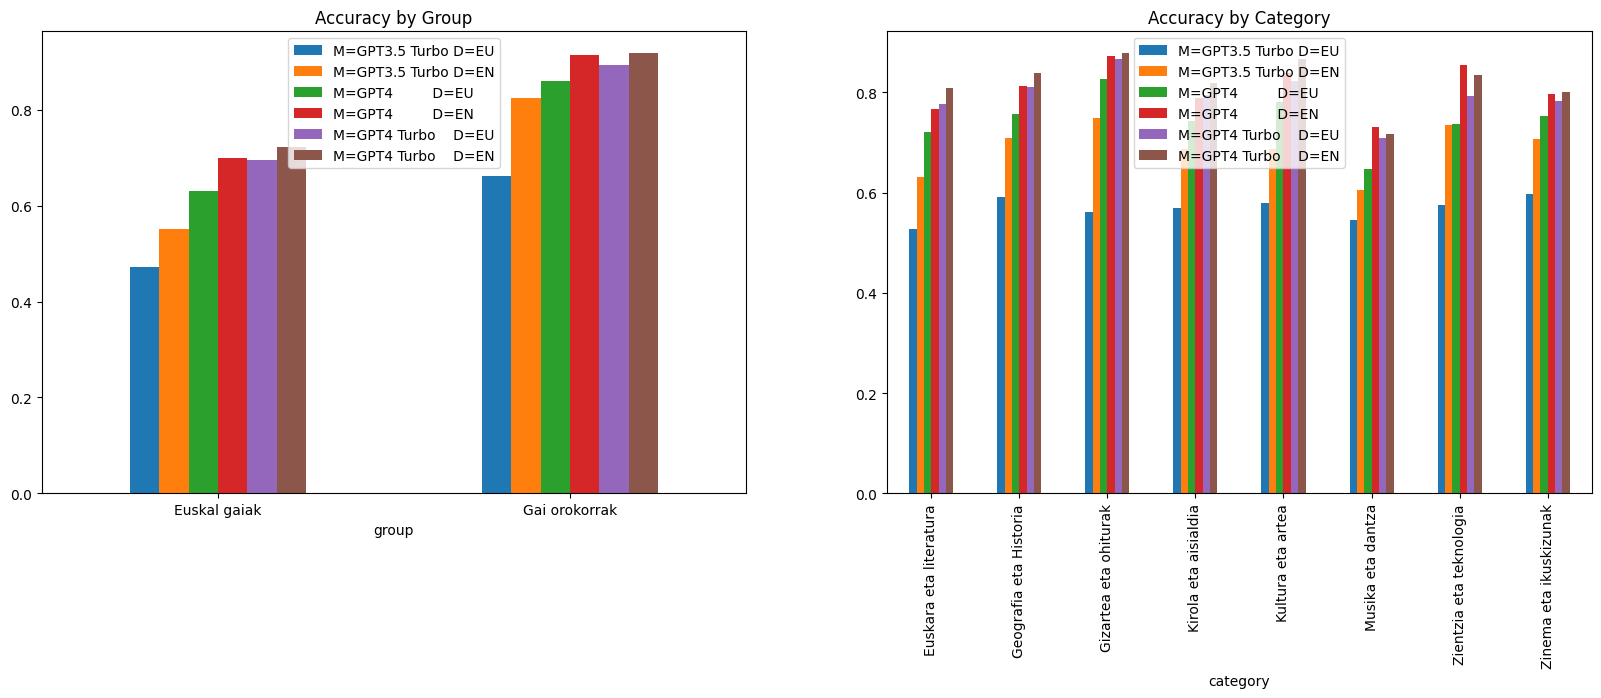

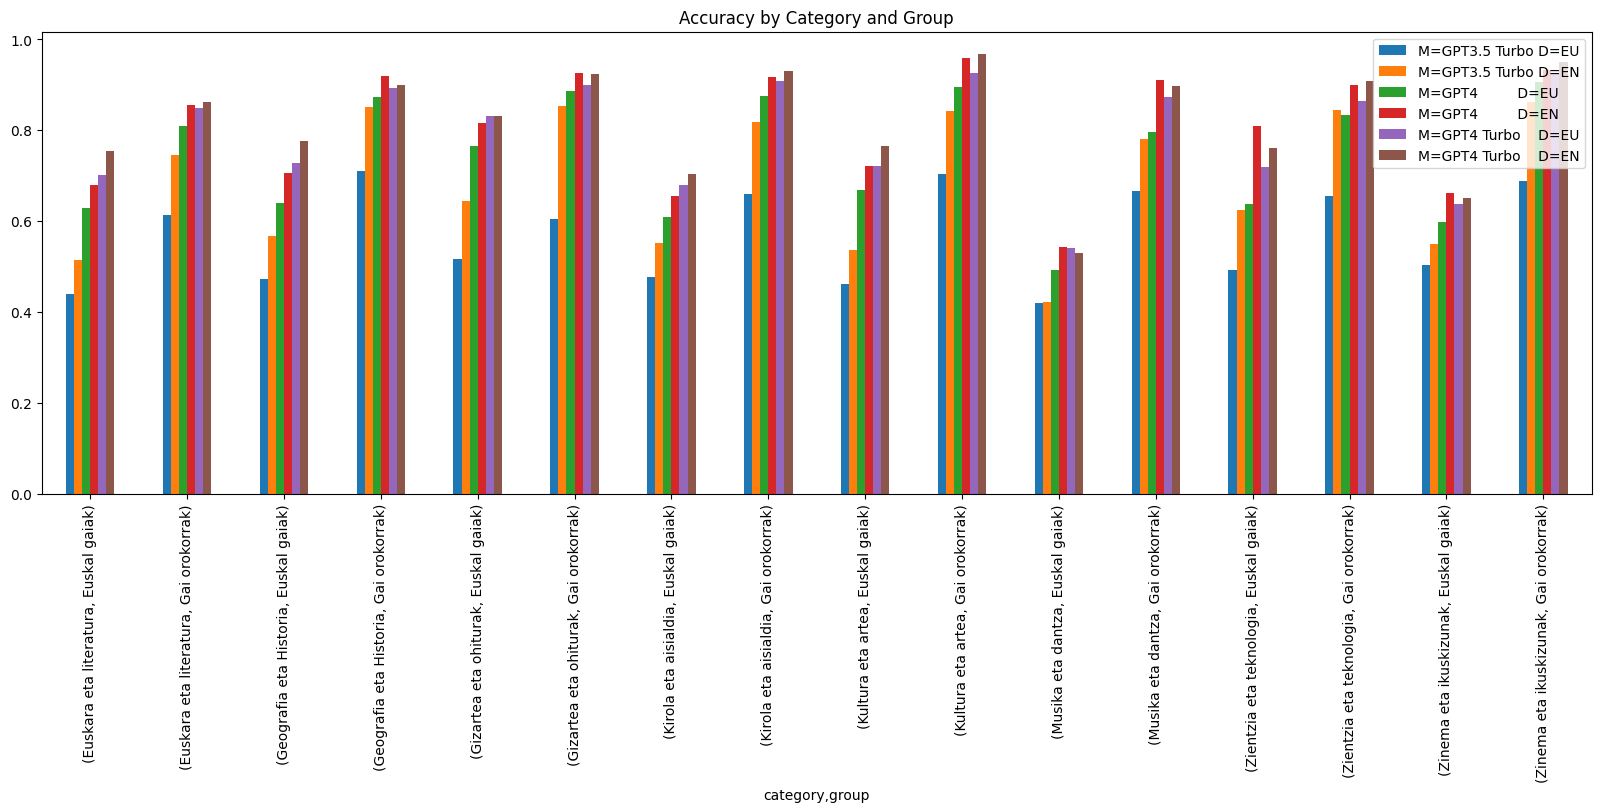

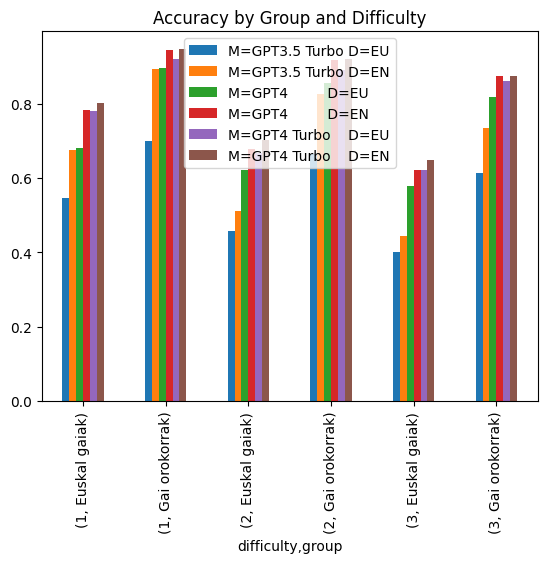

In [7]:
plot_eu_en_sizes(df_gpt35turbo_bertaqa_eu, df_gpt35turbo_bertaqa_en, df_gpt4turbo_bertaqa_eu, df_gpt4turbo_bertaqa_en, df_gpt4_bertaqa_eu, df_gpt4_bertaqa_en)

In [8]:
# Calculate overlap of Basque and English questions of gpt4 turbo based on the current notebook. For example, some culture-specific questions might be correctly answered in Basque but not in English. Look at the questions that are answered correctly in both, incorrectly in both and correctly in Basque or in English only. Provide results by category, group and difficulty level.


Overall Results:
Both Correct (%)      74.516400
Both Incorrect (%)    13.141295
Basque Only (%)        4.878049
English Only (%)       7.464256
dtype: float64

Results by Category:
                         Both Correct (%)  Both Incorrect (%)  \
category                                                        
Euskara eta literatura          72.520325           14.146341   
Geografia eta Historia          77.500000           12.666667   
Gizartea eta ohiturak           82.623509            8.347530   
Kirola eta aisialdia            73.622705           12.353923   
Kultura eta artea               78.829604            9.982788   
Musika eta dantza               63.157895           20.543294   
Zientzia eta teknologia         74.149660           11.394558   
Zinema eta ikuskizunak          73.869347           15.577889   

                         Basque Only (%)  English Only (%)  
category                                                    
Euskara eta literatura          5.040650     

/tmp/ipykernel_3259371/971350943.py:54: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  category_results = results.groupby('category').apply(calculate_percentages)


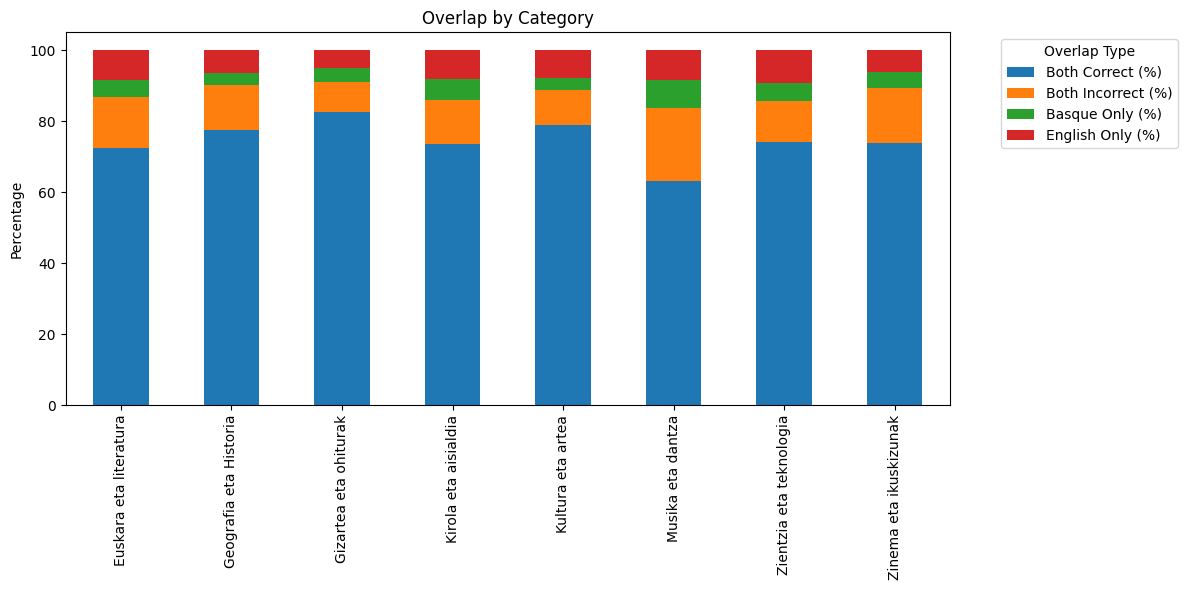


Results by Group:
               Both Correct (%)  Both Incorrect (%)  Basque Only (%)  \
group                                                                  
Euskal gaiak          62.098139           20.473773         7.360406   
Gai orokorrak         86.789298            5.894649         2.424749   

               English Only (%)  
group                            
Euskal gaiak          10.067682  
Gai orokorrak          4.891304  


/tmp/ipykernel_3259371/971350943.py:60: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  group_results = results.groupby('group').apply(calculate_percentages)


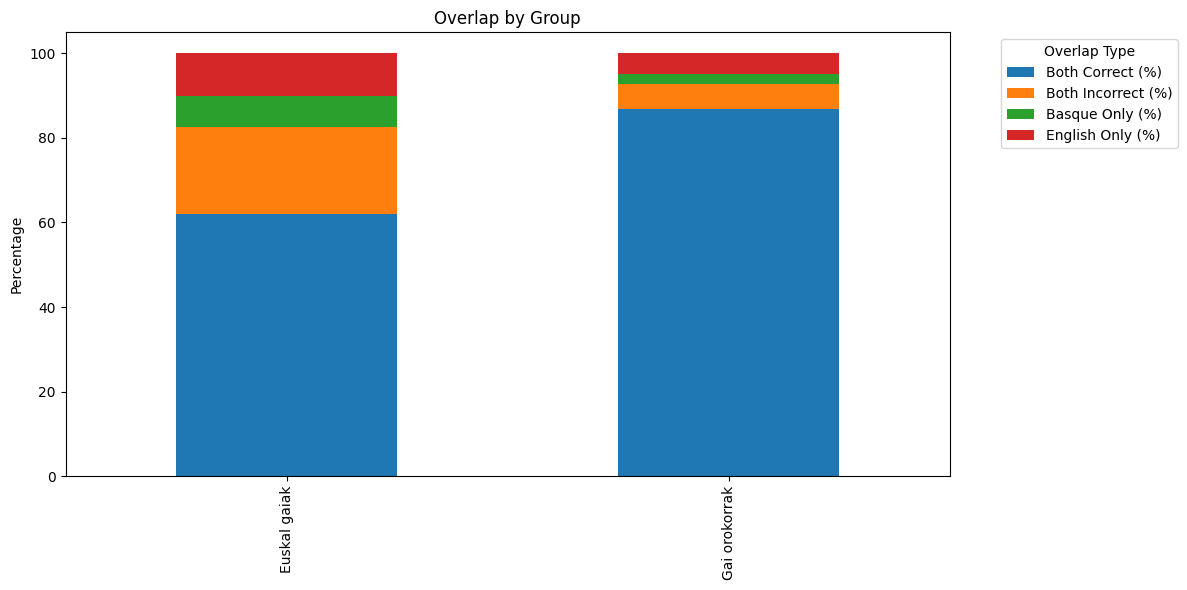

/tmp/ipykernel_3259371/971350943.py:66: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  difficulty_results = results.groupby('difficulty').apply(calculate_percentages)



Results by Difficulty:
            Both Correct (%)  Both Incorrect (%)  Basque Only (%)  \
difficulty                                                          
1                  81.494662            9.074733         3.499407   
2                  72.590883           13.329486         5.481823   
3                  68.212416           18.025430         5.833957   

            English Only (%)  
difficulty                    
1                   5.931198  
2                   8.597807  
3                   7.928197  


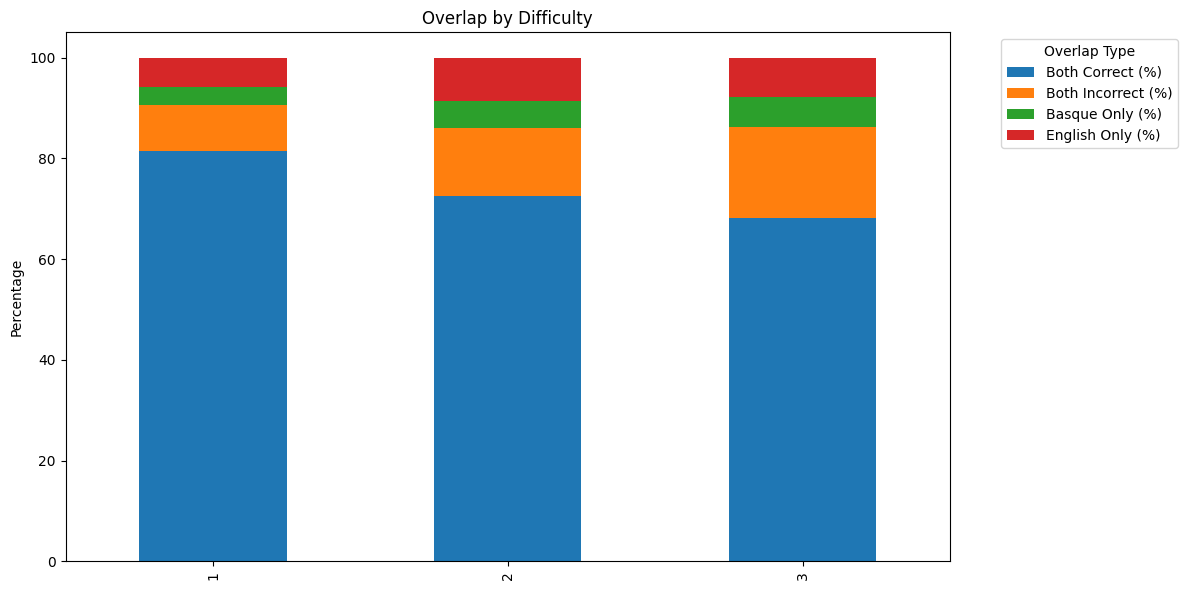

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

def analyze_overlap(df_eu, df_en):
    # Ensure the dataframes are aligned
    assert all(df_eu['id'] == df_en['id']), "Dataframes are not aligned"

    # Create a new dataframe with the results
    results = pd.DataFrame({
        'id': df_eu['id'],
        'category': df_eu['category'],
        'group': df_eu['group'],
        'difficulty': df_eu['difficulty'],
        'eu_correct': df_eu['correct'],
        'en_correct': df_en['correct']
    })

    # Categorize the results
    results['overlap'] = results.apply(lambda row: 
        'Both Correct' if row['eu_correct'] and row['en_correct'] else
        'Both Incorrect' if not row['eu_correct'] and not row['en_correct'] else
        'Basque Only' if row['eu_correct'] and not row['en_correct'] else
        'English Only', axis=1)

    return results

def calculate_percentages(group):
    total = len(group)
    return pd.Series({
        'Both Correct (%)': (group['overlap'] == 'Both Correct').sum() / total * 100,
        'Both Incorrect (%)': (group['overlap'] == 'Both Incorrect').sum() / total * 100,
        'Basque Only (%)': (group['overlap'] == 'Basque Only').sum() / total * 100,
        'English Only (%)': (group['overlap'] == 'English Only').sum() / total * 100
    })

def plot_results(data, title):
    ax = data.plot(kind='bar', stacked=True, figsize=(12, 6))
    plt.title(title)
    plt.xlabel('')
    plt.ylabel('Percentage')
    plt.legend(title='Overlap Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Assuming df_gpt4turbo_bertaqa_eu and df_gpt4turbo_bertaqa_en are already loaded
results = analyze_overlap(df_gpt4turbo_bertaqa_eu, df_gpt4turbo_bertaqa_en)

# Overall results
overall_results = calculate_percentages(results)
print("Overall Results:")
print(overall_results)

# Results by category
category_results = results.groupby('category').apply(calculate_percentages)
print("\nResults by Category:")
print(category_results)
plot_results(category_results, 'Overlap by Category')

# Results by group
group_results = results.groupby('group').apply(calculate_percentages)
print("\nResults by Group:")
print(group_results)
plot_results(group_results, 'Overlap by Group')

# Results by difficulty
difficulty_results = results.groupby('difficulty').apply(calculate_percentages)
print("\nResults by Difficulty:")
print(difficulty_results)
plot_results(difficulty_results, 'Overlap by Difficulty')

/tmp/ipykernel_3259371/1299437036.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  euskal_gaiak_category_results = euskal_gaiak_results.groupby('category').apply(calculate_percentages)



Results by Category for 'Euskal Gaiak' group:
                         Both Correct (%)  Both Incorrect (%)  \
category                                                        
Euskara eta literatura          63.934426           18.360656   
Geografia eta Historia          68.333333           18.000000   
Gizartea eta ohiturak           76.816609           10.726644   
Kirola eta aisialdia            58.783784           20.608108   
Kultura eta artea               66.101695           17.288136   
Musika eta dantza               41.522491           34.602076   
Zientzia eta teknologia         64.383562           16.438356   
Zinema eta ikuskizunak          56.711409           27.852349   

                         Basque Only (%)  English Only (%)  
category                                                    
Euskara eta literatura          6.229508         11.475410  
Geografia eta Historia          4.333333          9.333333  
Gizartea eta ohiturak           6.228374          6.228374

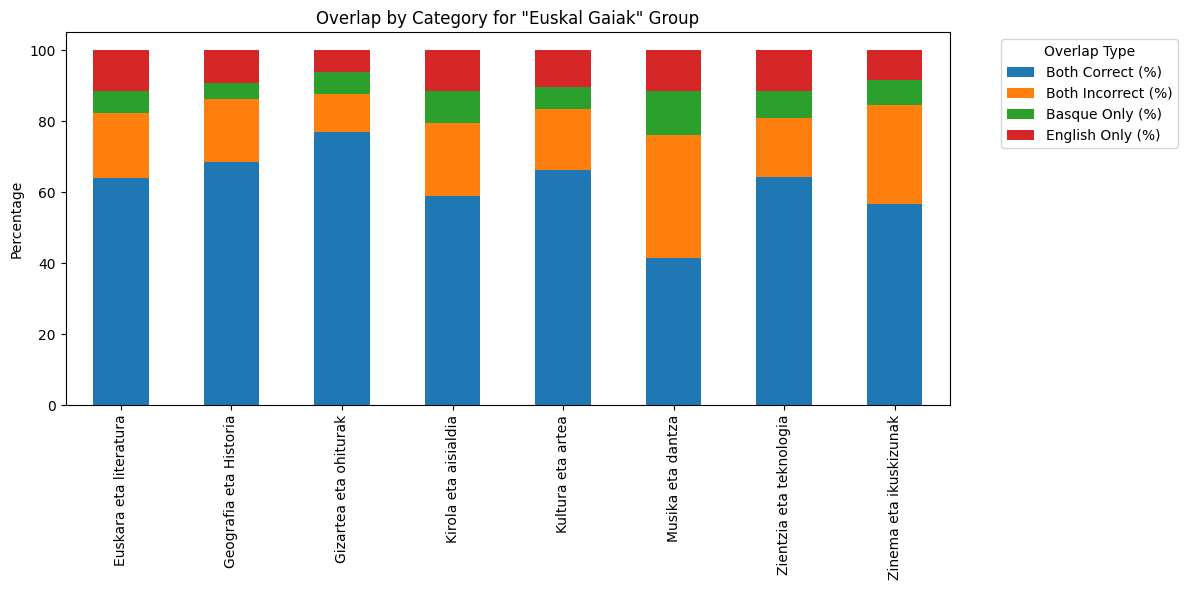

/tmp/ipykernel_3259371/1299437036.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  euskal_gaiak_difficulty_results = euskal_gaiak_results.groupby('difficulty').apply(calculate_percentages)



Results by Difficulty for 'Euskal Gaiak' group:
            Both Correct (%)  Both Incorrect (%)  Basque Only (%)  \
difficulty                                                          
1                  72.281959           14.217443         5.734767   
2                  58.672875           21.653085         8.149010   
3                  53.742515           26.796407         8.383234   

            English Only (%)  
difficulty                    
1                   7.765830  
2                  11.525029  
3                  11.077844  


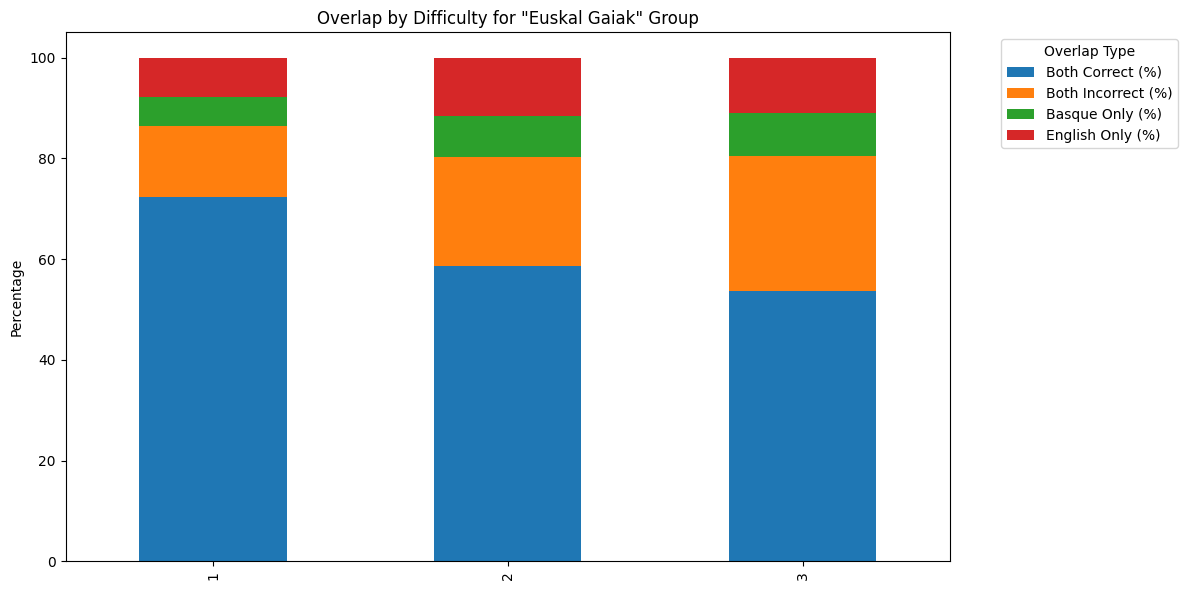

/tmp/ipykernel_3259371/1299437036.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  gai_orokorrak_category_results = results[results['group'] == 'Gai orokorrak'].groupby('category').apply(calculate_percentages)



Results by Category for 'Gai orokorrak' group:
                         Both Correct (%)  Both Incorrect (%)  \
category                                                        
Euskara eta literatura          80.967742           10.000000   
Geografia eta Historia          86.666667            7.333333   
Gizartea eta ohiturak           88.255034            6.040268   
Kirola eta aisialdia            88.118812            4.290429   
Kultura eta artea               91.958042            2.447552   
Musika eta dantza               84.000000            7.000000   
Zientzia eta teknologia         83.783784            6.418919   
Zinema eta ikuskizunak          90.969900            3.344482   

                         Basque Only (%)  English Only (%)  
category                                                    
Euskara eta literatura          3.870968          5.161290  
Geografia eta Historia          2.666667          3.333333  
Gizartea eta ohiturak           1.677852          4.02684

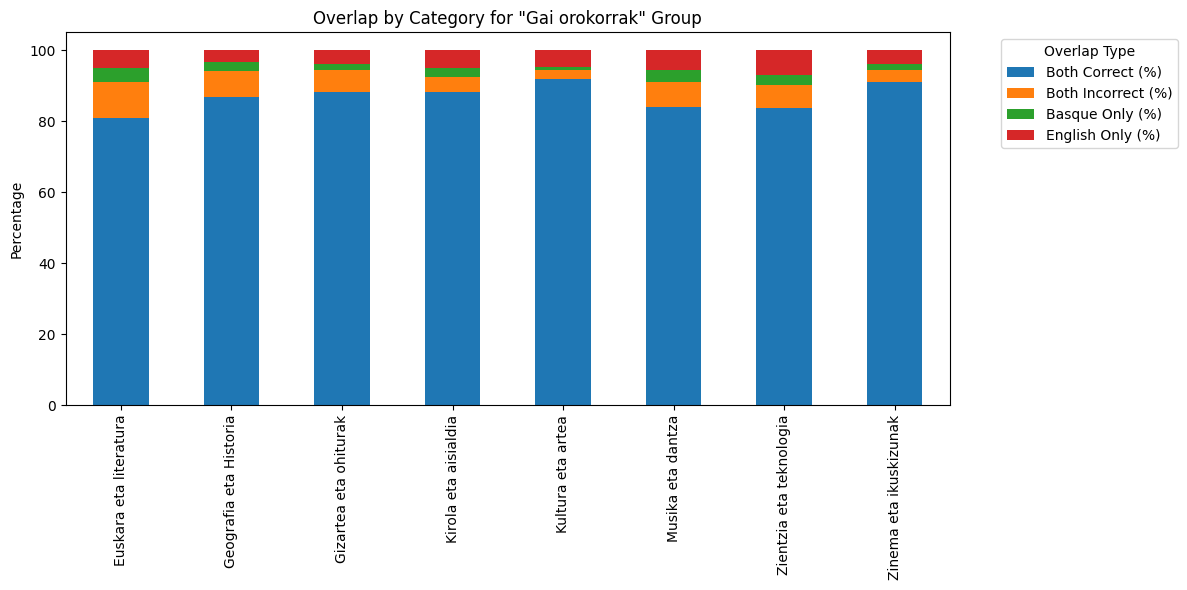

/tmp/ipykernel_3259371/1299437036.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  gai_orokorrak_difficulty_results = results[results['group'] == 'Gai orokorrak'].groupby('difficulty').apply(calculate_percentages)



Results by Difficulty for 'Gai orokorrak' group:
            Both Correct (%)  Both Incorrect (%)  Basque Only (%)  \
difficulty                                                          
1                  90.577150            4.004711         1.295642   
2                  86.270023            5.148741         2.860412   
3                  82.660688            9.267564         3.288490   

            English Only (%)  
difficulty                    
1                   4.122497  
2                   5.720824  
3                   4.783259  


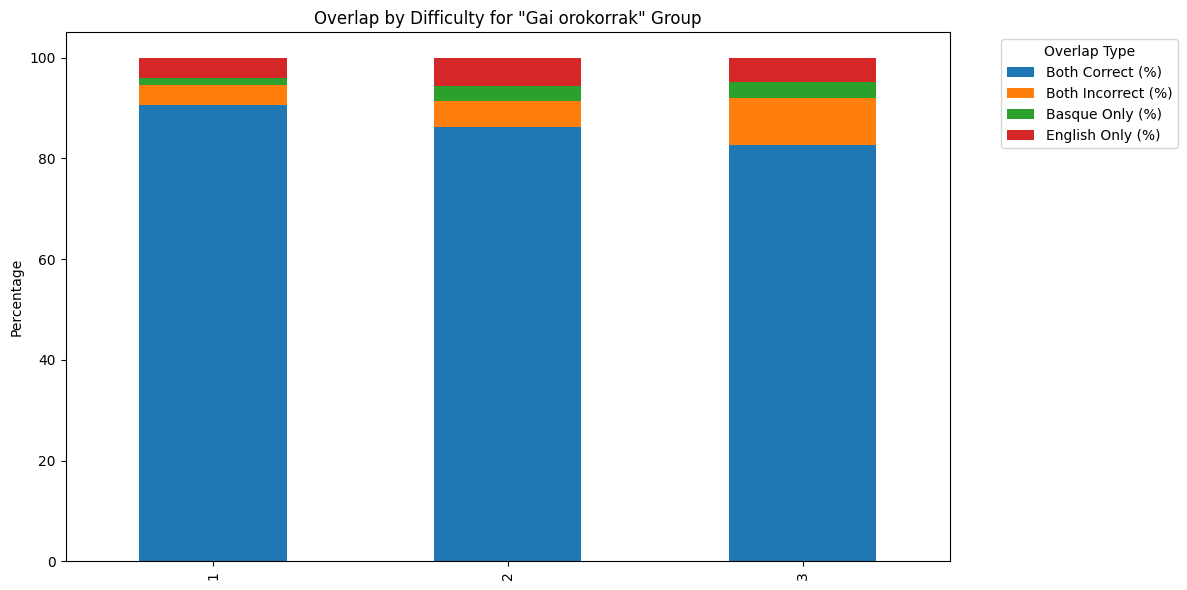

In [14]:

# New analysis for "Euskal Gaiak" group
euskal_gaiak_results = results[results['group'] == 'Euskal gaiak']

# Results by category for "Euskal Gaiak"
euskal_gaiak_category_results = euskal_gaiak_results.groupby('category').apply(calculate_percentages)
print("\nResults by Category for 'Euskal Gaiak' group:")
print(euskal_gaiak_category_results)
plot_results(euskal_gaiak_category_results, 'Overlap by Category for "Euskal Gaiak" Group')

# Results by difficulty for "Euskal Gaiak"
euskal_gaiak_difficulty_results = euskal_gaiak_results.groupby('difficulty').apply(calculate_percentages)
print("\nResults by Difficulty for 'Euskal Gaiak' group:")
print(euskal_gaiak_difficulty_results)
plot_results(euskal_gaiak_difficulty_results, 'Overlap by Difficulty for "Euskal Gaiak" Group')

# Results by category for "Gai orokorrak"
gai_orokorrak_category_results = results[results['group'] == 'Gai orokorrak'].groupby('category').apply(calculate_percentages)
print("\nResults by Category for 'Gai orokorrak' group:")
print(gai_orokorrak_category_results)
plot_results(gai_orokorrak_category_results, 'Overlap by Category for "Gai orokorrak" Group')

# Results by difficulty for "Gai orokorrak"
gai_orokorrak_difficulty_results = results[results['group'] == 'Gai orokorrak'].groupby('difficulty').apply(calculate_percentages)
print("\nResults by Difficulty for 'Gai orokorrak' group:")
print(gai_orokorrak_difficulty_results)
plot_results(gai_orokorrak_difficulty_results, 'Overlap by Difficulty for "Gai orokorrak" Group')